In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

x=pd.read_csv('iris.csv')
print('---INFO---')
print(x.info())
print('---HEAD---')
print(x.head(5))
print('---TAIL---')
print(x.tail(6))
print('---SHAPE---')
print(x.shape)
print('---DESCRIBE---')
print(x.describe())

---INFO---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
---HEAD---
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
---TAIL---
     sepal.length  sepal.width  petal.length  petal.width    variety
144           6.7          3.3           5.7        

In [14]:
x.duplicated().any()
x.drop_duplicates(inplace=True)
print(x)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]


In [15]:
y=x.iloc[:,0:4].values
print(y)
z=x.iloc[:,4].values
print(z)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
le=LabelEncoder()
zn=le.fit_transform(z)
print(zn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [17]:
ytrain,ytest,ztrain,ztest=train_test_split(y,zn,test_size=.25,random_state=25)
print(ztest)

[2 0 1 1 2 1 1 0 1 2 0 0 0 1 2 1 1 2 2 1 2 1 0 0 0 2 2 2 0 2 1 2 0 0 2 1 1
 0]


In [18]:
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(ytrain,ztrain)
z_predict=Knn.predict(ytest)
print("--------Test Class--------\n",ztest)
print("--------Predict Class--------\n",z_predict)
print(Knn.predict_proba(ytest))

--------Test Class--------
 [2 0 1 1 2 1 1 0 1 2 0 0 0 1 2 1 1 2 2 1 2 1 0 0 0 2 2 2 0 2 1 2 0 0 2 1 1
 0]
--------Predict Class--------
 [2 0 1 1 1 1 1 0 1 2 0 0 0 2 2 1 1 2 2 1 2 1 0 0 0 2 2 2 0 2 1 2 0 0 2 1 1
 0]
[[0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.6 0.4]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [0.  0.2 0.8]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [0.  0.2 0.8]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]]


In [20]:

print(accuracy_score(ztest,z_predict,normalize=True))

0.9473684210526315


In [83]:
cm=confusion_matrix(ztest,z_predict,normalize=None,labels=Knn.classes_)
print(cm)


[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]


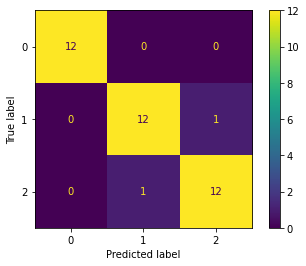

In [84]:
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Knn.classes_)
cm_dis.plot()
plt.show()
